In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
from __future__ import print_function, division

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.constraint import maxnorm
from keras.utils import np_utils

Using Theano backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
img_rows, img_cols = 28, 28
nb_epochs = 12
nb_filters = 32
batch_size= 128
nb_classes = 10
input_shape = (1, img_rows, img_cols)
kernel_size = (3,3)
pool_size = (2,2)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [8]:
X_train.shape

(60000, 1, 28, 28)

In [9]:
X_test.shape

(10000, 1, 28, 28)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train.shape

(60000, 1, 28, 28)

In [20]:
X_test.shape

(10000, 1, 28, 28)

In [24]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [25]:
y_train.shape

(60000, 10)

In [26]:
y_test.shape

(10000, 10)

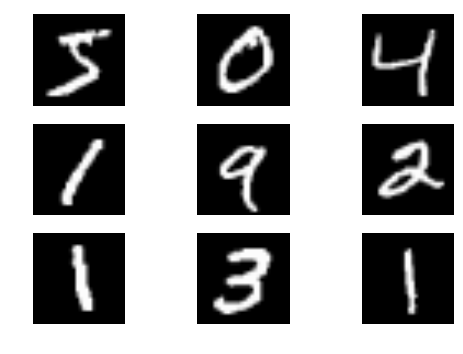

In [27]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

In [28]:
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], 
                        border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.2))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [30]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epochs, 
          show_accuracy=True, verbose=1, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 565s - loss: 0.4680 - acc: 0.8505 - val_loss: 0.0689 - val_acc: 0.9798

In [2]:
score = model.evaluate(X_test, y_test)
print("Score:", score[0])
print("accuracy:", score[1])

NameError: name 'model' is not defined

In [43]:
ypred = model.predict_classes(X_test)

10000/10000 [==============================] - 17s        64/10000 [..............................] - ETA: 28s

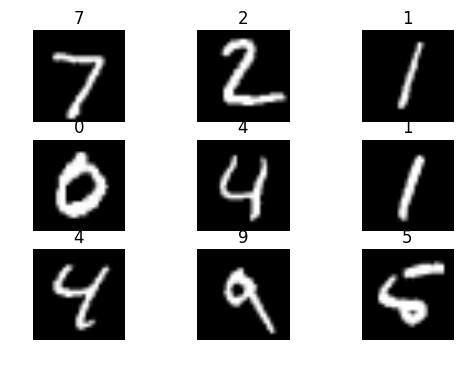

In [74]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap='gray')
    plt.title(ypred[i])
    plt.axis("off")